# Introduction 
Each year, banks are inundated with hundreds of credit card applications. The approval process for each application relies on several crucial factors, such as income level, delinquency records, and credit history. However, manually reviewing every single application can be an tedious, error-prone, and time-consuming task. Fortunately, the power of machine learning offers an automated solution to streamline this process. Nowadays, the majority, if not all, banks utilize machine learning algorithms to detect credit card approval. In this project, I aim to develop a credit card approval prediction by using machine learning techniques.

#### About the dataset:
I'll be using the [Credit Approval Data Set](http://archive.ics.uci.edu/ml/datasets/credit+approval) from the UCI Machine Learning Repository, which is a widely used dataset for credit card application analysis, it consists of a collection of anonymized credit card applications with various features and a corresponding target variable indicating whether the application was approved or not. The dataset includes numerical and categorical attributes. The target variable is binary, with '+' for approval and '-' for denial. Missing values are present, requiring data cleaning and preprocessing.

## Table of Contents
* [1.Load the data](#1-load-the-data)
* [2. Take a quick look at the data structure](#2-take-a-quick-look-at-the-data-structure)
* [3. Splitting the dataset into train and test sets](#3-splitting-the-dataset-into-train-and-test-sets)
    * [Stratify sampling](#stratify-sampling)
* [4. Discover and Visualize the Data to Gain Insights](#4-discover-and-visualize-the-data-to-gain-insights)
    * [4.1 Exploratory data analysis for categorical attributes](#41-exploratory-data-analysis-for-categorical-attributes)
        * [Separating the categorical and numerical attributes](#separating-the-categorical-and-numerical-attributes)
        * [Frequency Distribution](#frequency-distribution)
        * [Target Variable Analysis](#target-variable-analysis)
        * [Analyzing the correlation between categorical attributes and the target variable](#analyzing-the-correlation-between-categorical-attributes-and-the-target-variable)
    * [4.2 Exploratory data analysis for numerical attributes](#42-exploratory-data-analysis-for-numerical-attributes)
        * [Summarizing numerical attributes](#summarizing-numerical-attributes)
        * [Analyzing the correlation between numerical attributes and the target variable](#analyzing-the-correlation-between-numerical-attributes-and-the-target-variable)
        * [Visualizing the correlations between numerical attributes](#visualizing-the-correlations-between-numerical-attributes)
* [5. Handling missing values](#5-handling-missing-values)
    * [Missing values for categorical attributes](#missing-values-for-categorical-attributes)
    * [5.1 Missing values for numerical attributes](#51-missing-values-for-numerical-attributes)
* [6. Preprocessing the data](#6-preprocessing-the-data)
    * [6.1 Feature selection](#61-feature-selection)
        * [Highly correlated features](#highly-correlated-features)
        * [Important features](#important-features)
    * [6.2 Preparing the data for training](#62-preparing-the-data-for-training)
* [7. Trying out different models](#7-trying-out-different-models)
    * [Models predictions and evaluation](#models-predictions-and-evaluation)
    * [Fine-tuning the most promising models](#fine-tuning-the-most-promising-models)
* [8.Evaluating the best performing model on the test set](#8-Evaluating-the-best-performing-model-on-the-test-set)
* [9. Conclusion](#9-conclusion)


## 1.Load the data 

In [1]:
#import important libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load the data
df = pd.read_csv('C:\\Users\\C-ROAD\\Downloads\\crx (2).data' , header = None)

## 2.Take a quick look at the data structure

In [3]:
#take a quick look at the data
df.tail(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


In [4]:
df.info()
'''In the data description from the original source, it is mentioned that there are missing data.
However, upon examining the dataset, it appears that there are no explicit null values.
This suggests that the missing values have been replaced with a symbol or a specific value in the dataset. 
It is important to be aware of this substitution when working with the data to ensure accurate analysis and modeling.'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


'In the data description from the original source, it is mentioned that there are missing data.\nHowever, upon examining the dataset, it appears that there are no explicit null values.\nThis suggests that the missing values have been replaced with a symbol or a specific value in the dataset. \nIt is important to be aware of this substitution when working with the data to ensure accurate analysis and modeling.'

In [5]:
df.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [6]:
#let's take a look at the propotion of the target values
df[15].value_counts()/len(df[15])

-    0.555072
+    0.444928
Name: 15, dtype: float64

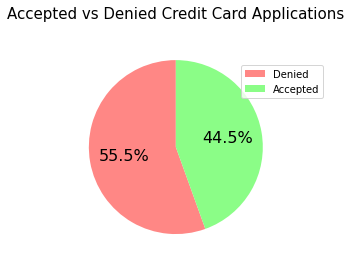

In [7]:
#visual representation for the proportions
values = df[15].value_counts()
plt.pie(values ,autopct='%1.1f%%',startangle=90 , radius =1 ,textprops={'fontsize': 16},colors = ['#ff8785','#8bfd87'])
plt.title('Accepted vs Denied Credit Card Applications',loc = 'center', fontdict ={'size':15},pad=20)
plt.legend(labels = ['Denied', 'Accepted'], loc =1,bbox_to_anchor=(1.2,.9))

## 3. Splitting the dataset into train and test sets
To avoid biased results, I'll split the data into a train set and a test set. The test set remains untouched during preprocessing and model training to prevent any influence on the training process. This ensures an unbiased evaluation of the model's performance.

##### stratify sampling:
Stratified sampling is used to ensure that the proportions of classes in the test and train sets are representative of the overall population. By stratifying the sampling process based on the target variable we can create subsets that maintain similar class distributions as the original dataset, the goal is to avoid sampling bias, which can occur if the train and test sets do not accurately reflect the distribution of the target variable in the population.

In [8]:
df[16]= np.where(df[15].values=='+',1,0)

In [9]:
from sklearn.model_selection import train_test_split
train_df ,test_df = train_test_split(df , test_size =0.3,stratify = df[16], random_state =3)

In [10]:
print (train_df[15].value_counts()/len(train_df[15]))
print (test_df[15].value_counts()/len(test_df[15]))

-    0.554865
+    0.445135
Name: 15, dtype: float64
-    0.555556
+    0.444444
Name: 15, dtype: float64


In [11]:
#getting the data back to its original shape
train_df.drop(16 , axis = 'columns' , inplace =True)
test_df.drop(16 , axis = 'columns', inplace = True)

## 4.Discover and Visualize the Data to Gain Insights
Now for the fun part! 
visualization, exploring, and analyzing the data to understand it and gain insights

### 4.1Exploratory data analysis for categorical attributes

##### -Separating the categorical and numerical attributes
To perform exploratory data analysis (EDA) on the dataset, we will begin by segregating the data into separate subsets based on their respective data types using a for loop.

In [12]:
#the missing values in the dataset are labeled with '?' which can be seen in the dataframe above, we'll be replacing them with null
train_df.replace('?', np.nan , inplace = True)
test_df.replace ('?' , np.nan, inplace = True )

In [13]:
train_df.info()
#As you can see the "1" column has an 'object' data type with numerical values, likely because of the presence of the symbol '?'.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 505 to 406
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       474 non-null    object 
 1   1       474 non-null    object 
 2   2       483 non-null    float64
 3   3       479 non-null    object 
 4   4       479 non-null    object 
 5   5       477 non-null    object 
 6   6       477 non-null    object 
 7   7       483 non-null    float64
 8   8       483 non-null    object 
 9   9       483 non-null    object 
 10  10      483 non-null    int64  
 11  11      483 non-null    object 
 12  12      483 non-null    object 
 13  13      474 non-null    object 
 14  14      483 non-null    int64  
 15  15      483 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 64.1+ KB


In [14]:
train_df = train_df.apply(pd.to_numeric, errors = 'ignore')
train_df.info()
#The data types are now accurately represented, which ensures the proper functioning of the following for loop.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 505 to 406
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       474 non-null    object 
 1   1       474 non-null    float64
 2   2       483 non-null    float64
 3   3       479 non-null    object 
 4   4       479 non-null    object 
 5   5       477 non-null    object 
 6   6       477 non-null    object 
 7   7       483 non-null    float64
 8   8       483 non-null    object 
 9   9       483 non-null    object 
 10  10      483 non-null    int64  
 11  11      483 non-null    object 
 12  12      483 non-null    object 
 13  13      474 non-null    float64
 14  14      483 non-null    int64  
 15  15      483 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 64.1+ KB


In [15]:
cat=[]
num=[] 
for col in train_df.columns:
    if train_df[col].dtype =='O':
        cat.append(col)
    else:
        num.append(col)

In [16]:
print('categorical columns list:', cat ,'\n''numerical columns list:', num)

categorical columns list: [0, 3, 4, 5, 6, 8, 9, 11, 12, 15] 
numerical columns list: [1, 2, 7, 10, 13, 14]


###### -Frequency Distribution: 
I'll start by creating countplots to visualize the frequency distribution of each categorical variable. This will give us an overview of the distribution of categories and help identify the most common categories.

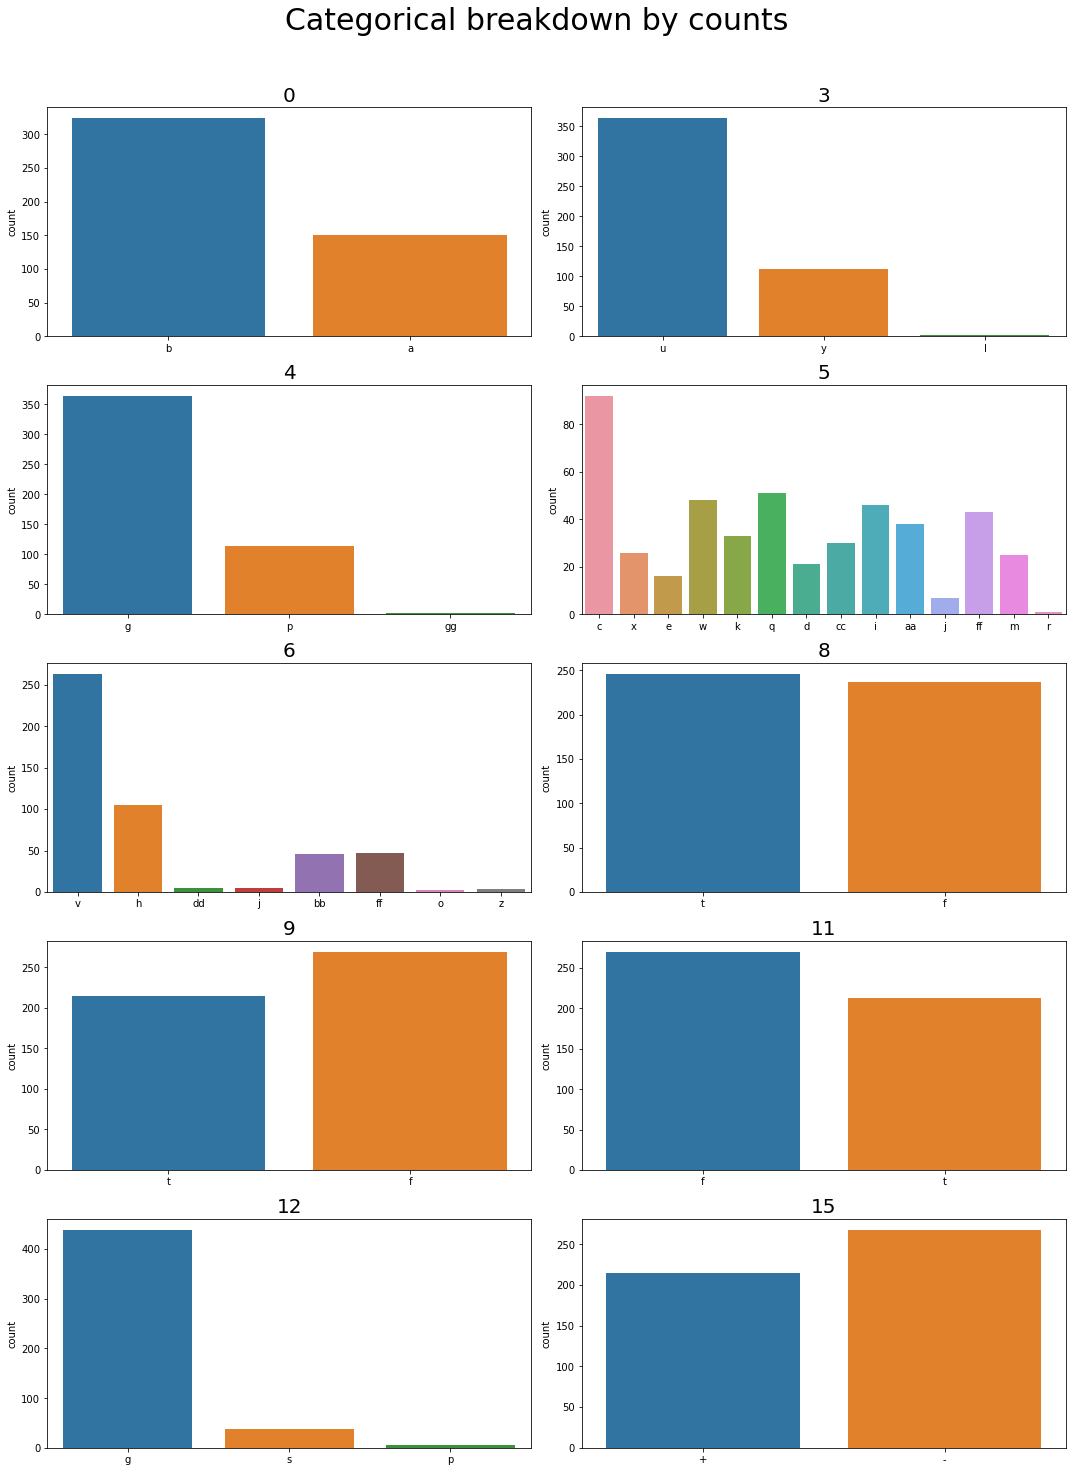

In [17]:
import seaborn as sns
plt.figure(figsize=(15,20))
plt.suptitle('Categorical breakdown by counts', fontsize = 30 , y=1.02)
for i,col in enumerate(cat):
    plt.subplot(5,2,i+1)
    plt.title(col,  fontsize = 20)
    sns.countplot(x=train_df[col]).set(xlabel=None)
    plt.tight_layout()
plt.show()

###### -Target Variable Analysis:
A stacked plot can be used to visualize the distribution of approvals and rejections across different categories or variables, providing insights into the relationship between the target variable and other categorical variables.

<Figure size 1080x1440 with 0 Axes>

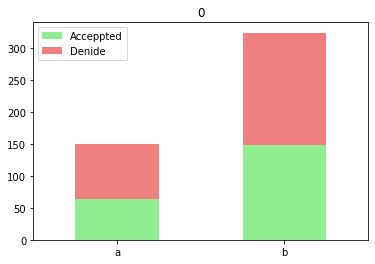

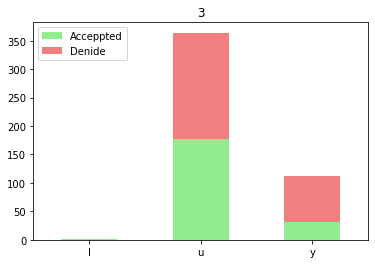

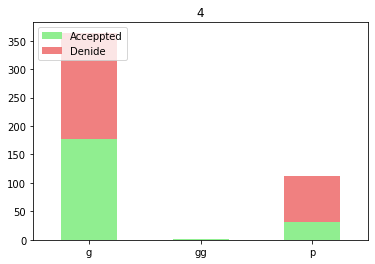

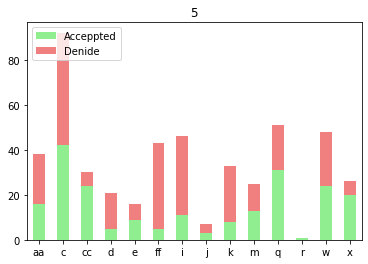

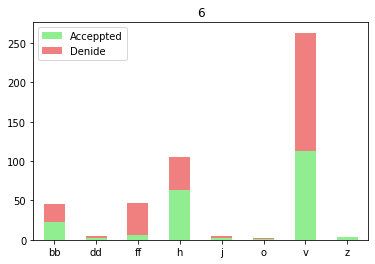

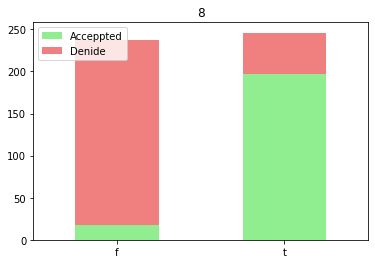

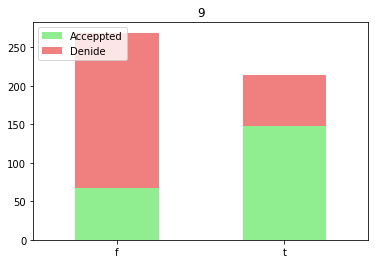

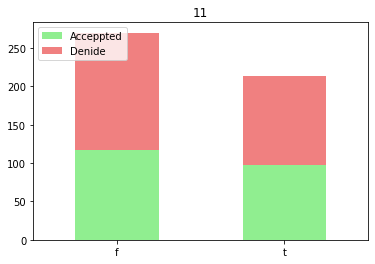

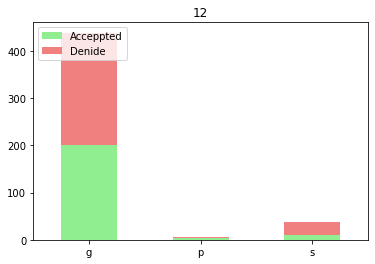

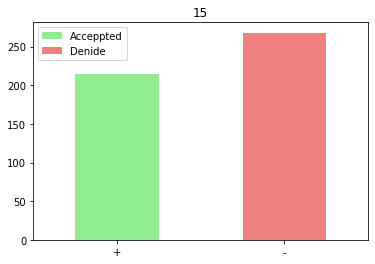

In [18]:
plt.figure(figsize=(15,20))
plt.suptitle('Target Variable Analysis', fontsize = 30 , y=1.02)
label_mapping ={'+':'Acceppted', "-": "Denide"}
updated_labels = list(map(label_mapping.get, train_df[15].unique()))
colors = ['lightgreen', 'lightcoral']
for i,col in enumerate(cat):
    ax = train_df.groupby([col,15]).size().unstack().plot.bar(stacked=True, color=colors)
    ax.set_title(col)
    ax.legend(updated_labels, loc='upper left')
    ax.set_xlabel(None)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()


Notice that the "8" attribute in the "t" category has a much higher proportion of "Accepted" compared to "Denied," while the "f" category shows the opposite pattern, which suggests that the "8" attribute may have a strong association with the Accepted or denied stats. However, it's important to further investigate and analyze the data to confirm the relationship and consider other factors that might contribute to the approval or rejection decision.

##### -Analyzing the correlation between categorical attributes and the target variable:
The correlation matrix helps us identify the linear relationship with the target variable.

In [19]:
dummies = pd.get_dummies(train_df[cat])
corr_matrix = dummies.corr()
corr_matrix['15_-'].sort_values(ascending = False)

15_-    1.000000
8_f     0.729141
9_f     0.442311
6_ff    0.209737
5_ff    0.206859
3_y     0.180085
4_p     0.180085
5_i     0.134485
5_k     0.110455
12_s    0.107001
5_d     0.088818
6_v     0.034049
11_f    0.026735
0_a     0.024940
5_aa    0.014160
6_j     0.009288
6_dd    0.009288
5_j     0.004042
6_o    -0.007119
5_c    -0.011114
6_bb   -0.021626
11_t   -0.026735
0_b    -0.033479
5_m    -0.035195
5_w    -0.036672
5_e    -0.043712
12_p   -0.049994
5_r    -0.050854
6_z    -0.056057
4_gg   -0.071993
3_l    -0.071993
12_g   -0.080872
5_q    -0.112490
4_g    -0.154408
3_u    -0.154408
5_x    -0.155547
6_h    -0.164234
5_cc   -0.183754
9_t    -0.442311
8_t    -0.729141
15_+   -1.000000
Name: 15_-, dtype: float64

It seems that based on this analysis that the "8" attribute has the strongest correlation with the target variable, followed by the "9" attribute which suggests that the categories within these attributes might have a significant impact on determining the target variable's values. It could indicate that certain categories in the "8" and "9" attributes are more likely to be associated with the target variable's positive or negative outcomes.

### 4.2 -Exploratory data analysis for numerical attributes

##### -summarizing numerical attributes:
Visualizing the distributions of numerical attributes using histograms and box plots is a great way to gain insights and analyze the data further.

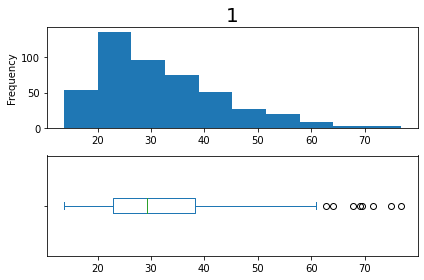

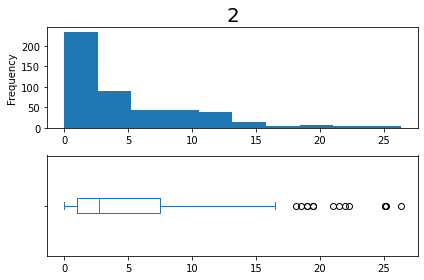

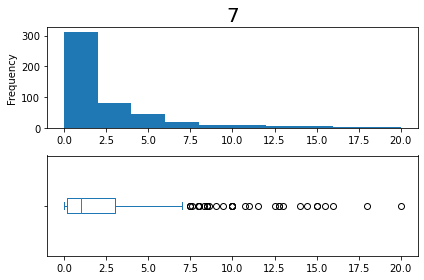

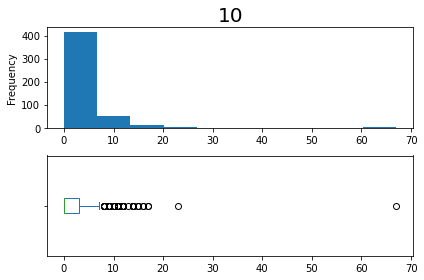

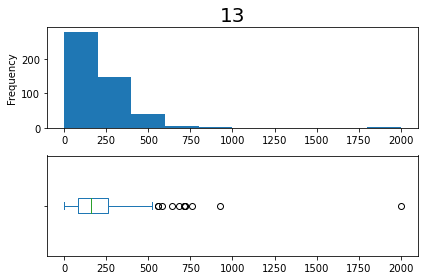

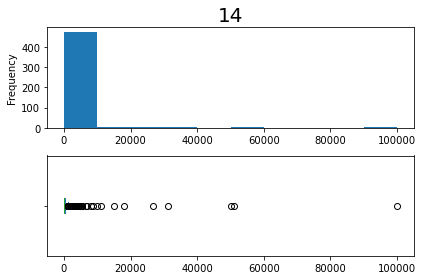

In [20]:
for att in num:
    plt.subplot(2,1,1)
    train_df[att].plot.hist()
    plt.title(att,  fontsize = 20)
    plt.subplot(2,1,2)
    train_df[att].plot.box(vert=False)
    plt.yticks([1], [''])
    plt.tight_layout()
    plt.show()

Based on the analysis, we can see that several distributions in the dataset are highly skewed to the right. This skewness poses a potential risk of introducing biases when using certain algorithms. Furthermore, the attributes exhibit variations in scales, and outliers are noticeably present. To ensure optimal performance and reliable results, it is crucial to address these issues by employing appropriate data transformations.

##### -Analyzing the correlation between numerical attributes and the target variable:
we will use the correlation matrix to examine the linear relationship between numerical attributes and the target values

In [21]:
#checking the correlations 
target_dummies = pd.get_dummies(train_df[15])
train_df_num = pd.concat([train_df[num],target_dummies['+']],axis =1)
corr_matrix_num = train_df_num.corr()
corr_matrix_num['+'].sort_values(ascending = False)

+     1.000000
10    0.402741
7     0.344892
2     0.210324
14    0.165777
1     0.137319
13   -0.077317
Name: +, dtype: float64

based on the correlation values it appears that attribute "10" has the strongest positive correlation with the positive class of the target value, This means that as the values of attribute "10" increase, the likelihood of the positive class also tends to increase. 

##### -visulazing the correlations between numerical attributes:
we will check for correlation between attributes by using Pandas scatter_matrix function, which will plot every numerical attribute against every other numerical attribute.

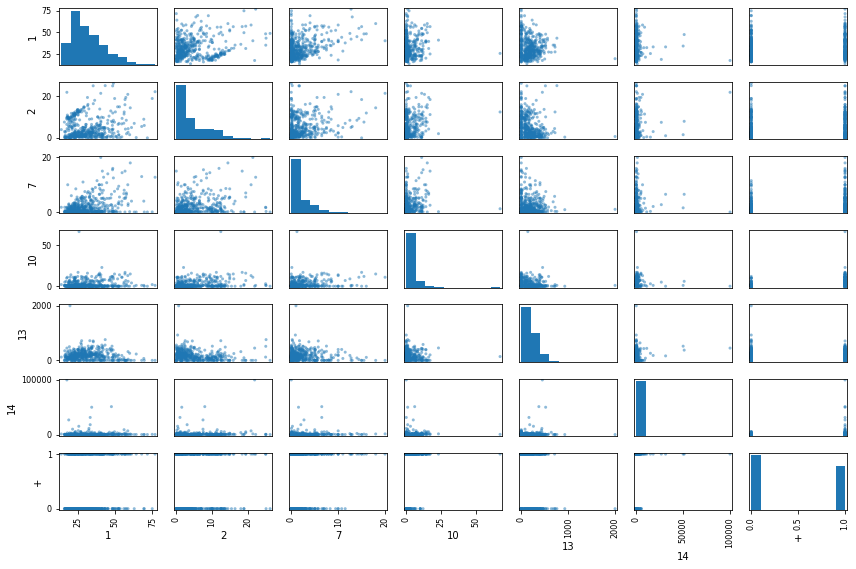

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_df_num, figsize=(12, 8))
plt.tight_layout()
plt.show()

## 5- Handling missing values

### Missing values for categorical attributes

In [23]:
#finding the columns with missing values
miss_cat =[]
for i in cat:
    if train_df[i].isnull().sum() !=0:
        miss_cat.append(i)

<Figure size 1080x1440 with 0 Axes>

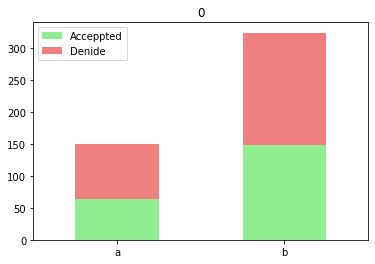

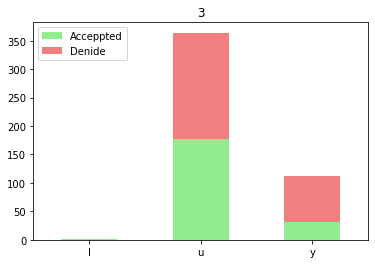

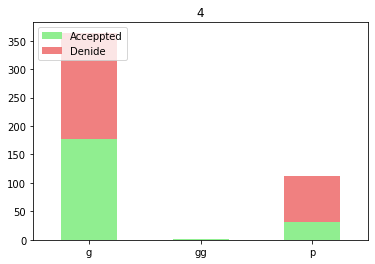

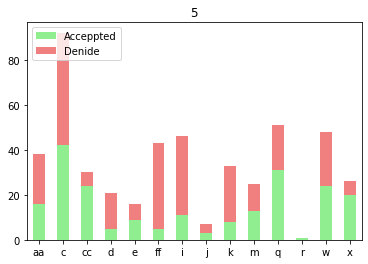

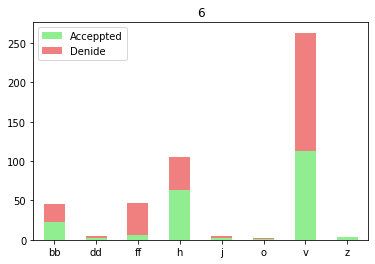

In [24]:
plt.figure(figsize=(15,20))
plt.suptitle('Target Variable Analysis', fontsize = 30 , y=1.02)
label_mapping ={'+':'Acceppted', "-": "Denide"}
updated_labels = list(map(label_mapping.get, train_df[15].unique()))
colors = ['lightgreen', 'lightcoral']
for i,col in enumerate(miss_cat):
    ax = train_df.groupby([col,15]).size().unstack().plot.bar(stacked=True, color=colors)
    ax.set_title(col)
    ax.legend(updated_labels, loc='upper left')
    ax.set_xlabel(None)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

you can see that in all categorical columns with missing values the leading value (most frequent value) represents a roughly 50-50 distribution, it suggests that the missing values in those columns are not strongly associated with a specific category or classification. In such a scenario, filling in the missing values with the most popular value (mode) can be a reasonable approach.

In [25]:
#don't forget to fill in the missing values in the test set
for col in miss_cat:
    train_df[col].fillna(train_df[col].mode()[0],inplace=True)
    test_df[col].fillna(train_df[col].mode()[0],inplace=True)

### 5.1 Missing values for numerical attributes

In [26]:
#finding the columns with missing values
miss_num =[]
for i in num:
    if train_df[i].isnull().sum() !=0:
        miss_num.append(i)

In [27]:
miss_num

[1, 13]

since these numerical distributions are skewed and contains outliers we'll impute with the median because it will provide a more robust measure of central tendency.

In [28]:
for col in miss_num:
    train_df[col].fillna(train_df[col].median() , inplace =True)
    test_df[col].fillna(train_df[col].median(), inplace =True)

In [29]:
# Count the number of NaNs in the datasets and print the counts to verify
print(train_df.isnull().sum())
print(test_df.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64


## 6.preprosecing the data
Preprocessing the data is an important step to prepare it for training. It involves transforming and cleaning the data to ensure it is in a suitable format for the machine learning algorithms.

### 6.1 Feature selection:
Feature selection is an important preprocessing step in which we analyze the importance of different features and drop the ones that have little to no effect on the learning process. While using all the features may seem appealing, it can result in slower learning and potential overfitting, we also need to remove highly correlated features because they can potentially introduce multicollinearity issues in the analysis.


By selecting the most relevant features, we can improve the efficiency of the learning process and potentially enhance the model's performance. This involves identifying the features that have the strongest correlation or influence on the target variable. By focusing on these important features, we can reduce dimensionality and improve the model's interpretability.

In [30]:
# first dummy encoding categorical features
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

In [31]:
train_df

,1,2,7,10,13,14,0_a,0_b,3_l,3_u,...,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,15_+,15_-
505,31.33,19.500,7.000,16,0.0,5000,0,1,0,1,...,1,0,1,1,0,1,0,0,1,0
253,23.17,11.125,0.460,1,100.0,0,0,1,0,1,...,1,0,1,1,0,1,0,0,1,0
521,30.00,5.290,2.250,5,99.0,500,1,0,0,1,...,1,0,1,0,1,1,0,0,1,0
242,28.33,5.000,11.000,0,70.0,0,0,1,0,1,...,1,1,0,0,1,1,0,0,1,0
13,48.08,6.040,0.040,0,0.0,2690,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,36.75,0.125,1.500,0,232.0,113,0,1,0,0,...,0,1,0,0,1,1,0,0,1,0
363,16.92,0.335,0.290,0,200.0,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,1
445,29.21,11.250,0.000,0,160.0,5200,1,0,0,1,...,0,1,0,1,0,1,0,0,0,1
341,42.75,4.085,0.040,0,108.0,100,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


In [32]:
test_df

,1,2,7,10,13,14,0_a,0_b,3_l,3_u,...,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,15_+,15_-
568,0,0.375,0.375,8,0,162,0,1,0,0,...,1,0,1,0,1,1,0,0,1,0
47,0,4.460,6.040,3,0,300,0,1,0,1,...,1,0,1,1,0,1,0,0,1,0
269,0,0.165,0.210,0,0,40,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
498,0,0.500,1.460,5,0,0,0,1,0,1,...,1,0,1,0,1,1,0,0,1,0
114,0,1.250,1.375,3,0,210,0,1,0,0,...,1,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0,3.000,0.040,0,0,40,0,1,0,1,...,0,1,0,0,1,1,0,0,0,1
334,0,2.500,0.500,0,0,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
18,0,0.250,0.665,0,0,0,0,1,0,1,...,1,1,0,0,1,1,0,0,1,0
21,0,1.000,0.835,0,0,0,0,1,0,1,...,1,1,0,1,0,0,0,1,1,0


In [33]:
#next separate the X_train , y_train ,X_test , y_test 
X_train , y_train = train_df.iloc[: ,:-2] ,train_df.iloc[: , [-1]].values.ravel()
X_test , y_test = test_df.iloc[: ,:-2],test_df.iloc[: , [-1]].values.ravel()

##### -Highly correlated features:
When two or more features are highly correlated, it means they carry similar information and can potentially introduce multicollinearity issues in the analysis. A heatmap visualizes the correlation between features in a dataset, allowing you to identify highly correlated features.

<AxesSubplot:>

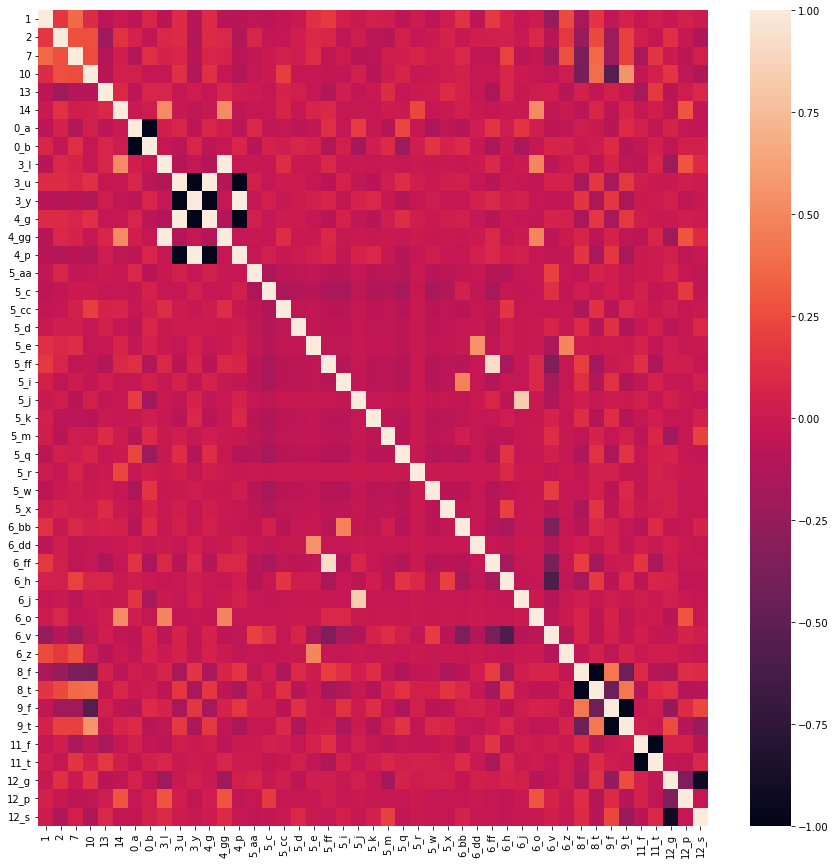

In [34]:
#heatmap
import seaborn as sns
corr_matrix_all = X_train.corr()
plt.figure(figsize = (15,15))
HM = sns.heatmap(data =corr_matrix_all , annot =False , cmap ='rocket')
HM

While the heat map provides a visual representation of correlations, manually sorting and identifying standout correlations can be challenging. To simplify this process, we can create a function that automatically sorts the correlations and highlights the most significant ones. This function will save time and make it easier to identify the important correlations for feature selection.

In [35]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with any other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [36]:
corr_features = correlation(X_train, 0.98)
print(len(set(corr_features)))

8


In [37]:
corr_features

{'0_b', '11_t', '3_y', '4_g', '4_gg', '4_p', '8_t', '9_t'}

In [38]:
#droping the features
X_train.drop(corr_features,axis=1, inplace = True)
X_test.drop(corr_features,axis=1, inplace = True)

##### -Important features:
Since the target variable is binary, we can use the t-test to evaluate the importance of features based on their statistical significance. The t-test compares the means of the feature values between the two classes of the target variable. The resulting p-values indicate the statistical significance of the differences in means.

In [39]:
import statsmodels.api as sm

# Perform the statistical test using OLS
model = sm.OLS(y_train, X_train)
results = model.fit()

# Get the p-values of each feature
p_values = results.pvalues

# Set the p-value threshold for feature selection
p_value_threshold = 0.07

# Select the unimportant features
unimportant_features = p_values[p_values > p_value_threshold].index

# Drop the unimportant features from the dataset
X_train_selected = X_train.drop(unimportant_features, axis=1)
X_test_selected = X_test.drop(unimportant_features, axis=1)

In [40]:
#we started with 45 features and now we're down to 7
X_train_selected

,10,13,3_l,8_f,9_f,12_g,12_s
505,16,0.0,0,0,0,1,0
253,1,100.0,0,0,0,1,0
521,5,99.0,0,0,0,1,0
242,0,70.0,0,0,1,1,0
13,0,0.0,0,1,1,1,0
...,...,...,...,...,...,...,...
319,0,232.0,0,1,1,1,0
363,0,200.0,0,1,1,0,1
445,0,160.0,0,1,1,1,0
341,0,108.0,0,1,1,1,0


### 6.2 Preparing the data for traning:
we saw in the EDA part that the numerical attributes are skewed and on different scales so we need to perform some transformation to address these issues before we move on. Log transformation can help address skewness in the data, while standard scaling can bring the features to a similar scale.

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer

X_train_selected.columns = X_train_selected.columns.astype(str)
X_test_selected.columns = X_test_selected.columns.astype(str)

# Numerical attributes in X_train_selected and X_test_selected
numerical_cols = ['10', '13']

# categorical attributes in X_train_selected and X_test_selected
categorical_cols = [col for col in X_train_selected.columns if col not in numerical_cols]

# Define the log transformation function
log_transformer = FunctionTransformer(func=np.log1p)

# Define the column transformer for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', Pipeline([
            ('log_transform', log_transformer),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('categorical', 'passthrough', categorical_cols)
    ]
)

# Apply the preprocessing pipeline to X_train_selected and X_test_selected
rescaledX_train = preprocessor.fit_transform(X_train_selected)
rescaledX_test = preprocessor.transform(X_test_selected)


## 7.Trying out different models 
Now that we've put in the hard work, it's time to try out different models and see which ones show the most promise. Since this is a classification problem for credit card approval, I'm going to give Logistic Regression, Random Forest Classifier, SVC, and K-Nearest Neighbors Classifier a shot. We'll evaluate their performance and see which approach works best for our project. It's important to experiment and see how each model performs to make sure we're making the right choice.

##### -Models prediction and evaluation

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define the models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier())
]

# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Evaluate models using cross-validation
for name, model in models:
    scores = cross_val_score(model, rescaledX_train, y_train, cv=5, scoring='accuracy')
    
    accuracy = scores.mean()
    precision = cross_val_score(model, rescaledX_train, y_train, cv=5, scoring='precision_macro').mean()
    recall = cross_val_score(model, rescaledX_train, y_train, cv=5, scoring='recall_macro').mean()
    f1 = cross_val_score(model, rescaledX_train, y_train, cv=5, scoring='f1_macro').mean()
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print()


Model: Logistic Regression
Accuracy: 0.8612972508591066
Precision: 0.8636706508165517
Recall: 0.8666999821234136
F1-Score: 0.8609384287022012

Model: Random Forest
Accuracy: 0.8530283505154639
Precision: 0.8554853862853647
Recall: 0.8528700047129183
F1-Score: 0.8513037182430792

Model: SVM
Accuracy: 0.8716494845360826
Precision: 0.8713447957707242
Recall: 0.8751166040986137
F1-Score: 0.8710752569579994

Model: KNN
Accuracy: 0.8674613402061855
Precision: 0.8662698617464774
Recall: 0.8672192157053938
F1-Score: 0.8660948056898548



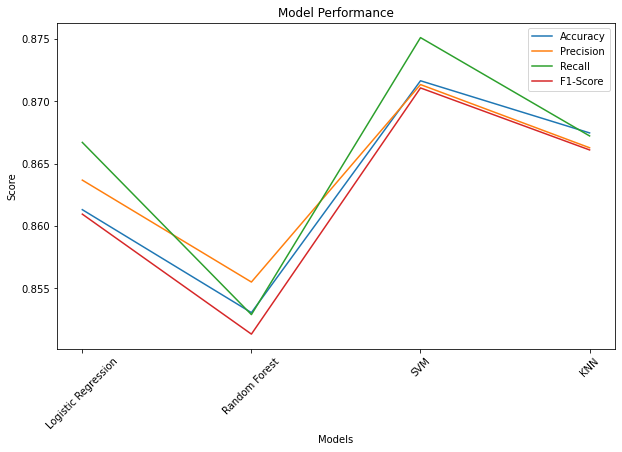

In [43]:
# Visualize model performance
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [accuracy_scores, precision_scores, recall_scores, f1_scores]

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.plot([name for name, _ in models], scores[i], label=metric)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance')
plt.legend()
plt.xticks(rotation=45)
plt.show()

When evaluating the performance of our models, we have four different measures to choose from. Each measure focuses on a specific aspect of the model's predictions. Depending on the task at hand, we can select the most suitable measure to assess the performance.

For example, if our main concern is to avoid classifying "denied" cases as "Approved," we should look at the Precision score. It tells us how many of the predicted "Approved" cases are actually correct. On the other hand, if we want to ensure that "Approved" cases are not wrongly classified as "denied," we should consider the Recall score. It indicates the proportion of actual "Approved" cases that are correctly identified.

If our goal is to have an overall understanding of the model's correctness, we can rely on the Accuracy score. It gives us the percentage of correctly predicted cases, regardless of the specific class.

For this project, I've chosen accuracy score as the evaluation metric to determine the best model. After evaluating the models, it is evident that all of them have demonstrated promising performance, indicating their potential for further enhancement through fine-tuning. Since the number of models is limited, it is feasible to fine-tune each of them without excessive time or resource requirements. This allows you to explore and maximize the potential of each model for better predictive analysis.

##### - fine-tuning the most promising models:
Fine-tuning involves optimizing the models by selecting the best hyperparameters that yield the highest performance. This process helps to further enhance the accuracy, precision, recall, and F1-score of the models. By fine-tuning the models, we can ensure that they are well-optimized and capable of making more accurate predictions.

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define the models and their respective parameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(solver='liblinear'),
        'param_grid': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 4, 6]
        }
    },
    'SVM': {
        'model': SVC(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    }
}

best_model = None
best_score = 0

model_names = []
accuracies = []

# Perform cross-validation and grid search for each model
for model_name, model_info in models.items():
    print(f"Model: {model_name}")
    model = model_info['model']
    param_grid = model_info['param_grid']
    
    # Perform grid search with 5-fold cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy',error_score='raise')
    grid_search.fit(rescaledX_train, y_train)
    
    # Track the model name and accuracy
    model_names.append(model_name)
    accuracies.append(grid_search.best_score_)

    # Print the best parameters and the corresponding cross-validated accuracy
    print("Best Parameters:", grid_search.best_params_)
    print("Cross-validated Accuracy:", grid_search.best_score_)
    print()
    
    # Track the best performing model
    if grid_search.best_score_ > best_score:
        best_model = grid_search.best_estimator_
        best_score = grid_search.best_score_

Model: Logistic Regression
Best Parameters: {'C': 1, 'penalty': 'l1'}
Cross-validated Accuracy: 0.8612972508591066

Model: Random Forest
Best Parameters: {'max_depth': 10, 'min_samples_split': 6, 'n_estimators': 300}
Cross-validated Accuracy: 0.8819802405498282

Model: SVM
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Cross-validated Accuracy: 0.8716494845360826

Model: KNN
Best Parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Cross-validated Accuracy: 0.8757517182130584



as you can see after finding the best parameters through grid search, there is an improvement in the accuracy scores of the models.

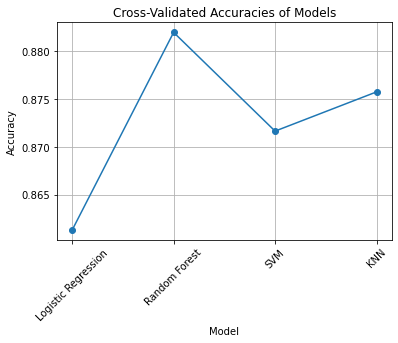

In [45]:
# Create a line plot of the accuracies
plt.plot(model_names, accuracies, marker='o')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Cross-Validated Accuracies of Models')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 8.Evaluating the best performing model on the test set
After performing the grid search and cross-validation to fine-tune the models, it's common practice to evaluate the best performing model on the test set to get an unbiased estimate of its performance and help assess its generalization capabilities and how well it performs on unseen data. By using the test set, which was not used during the model selection or parameter tuning process, you can obtain an unbiased estimate of the model's performance.

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the best model on the test set
y_pred = best_model.predict(rescaledX_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Evaluation Metrics for Best Model:{best_model}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Evaluation Metrics for Best Model:RandomForestClassifier(max_depth=10, min_samples_split=6, n_estimators=300)
Accuracy: 0.8405797101449275
Precision: 0.9456521739130435
Recall: 0.7565217391304347
F1-Score: 0.8405797101449275


## 9.Conclusion
The results were very close, but it was clear that the Random Forest model emerged as the best performer. With an accuracy of 0.88 on the validation set and 0.84 on the test data, it proved to be a valuable tool for predictive analysis in this project. 

And just like that we are done my friend, see you in another project!